# 01_BathymetryTransform

Regrid GEBCO Arctic Ocean Bathmetry to UniB sea ice concentration grid

## Import packages

In [1]:
import numpy as np
import xarray as xr

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

import sys

# path to own functions
sys.path.append('../../')
import data_UniBremen.SIC as UNISIC

In [2]:
# ASI SIC 6.25 km grid
#---------------------
# SIC
data = {}
data['6250'] = UNISIC.open_remote_file(datetime(2021, 3, 24, 0, 0), 
                                      res = '6250', hem = 'n', method = 'urllib',
                                      area = True, include_units=False)

print(data['6250'].keys())

dict_keys(['proj', 'ds', 'x', 'y', 'xx', 'yy', 'sic', 'area'])


In [3]:
master = {}
master['avg'] = np.zeros((1792, 1216))
master['5th'] = np.zeros((1792, 1216))
master['25th'] = np.zeros((1792, 1216))
master['50th'] = np.zeros((1792, 1216))
master['75th'] = np.zeros((1792, 1216))
master['95th'] = np.zeros((1792, 1216))
master['N_abv_slvl'] = np.zeros((1792, 1216))

In [4]:

file1 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V1.nc'
ds = xr.open_dataset(file1)
ds.close()
for key in master.keys():
    master[key][0:690, :] = ds[key][0:690, :]
    
    
file2 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V2.nc'
ds = xr.open_dataset(file2)
ds.close()
for key in master.keys():
    master[key][690:800, :] = ds[key][690:800, :]
    
file3 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V3.nc'
ds = xr.open_dataset(file3)
ds.close()
for key in master.keys():
    master[key][800:900, 0:600] = ds[key][800:900, 0:600]

    
file4 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V4.nc'
ds = xr.open_dataset(file4)
ds.close()
for key in master.keys():
    # recorded wrong in attriibutes, should be 900:1000
    master[key][900:1000, 0:600] = ds[key][900:1000, 0:600]

file5 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V5.nc'
ds = xr.open_dataset(file5)
ds.close()
for key in master.keys():
    master[key][1000:1250, 0:600] = ds[key][1000:1250, 0:600]

file6 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V6.nc'
ds = xr.open_dataset(file6)
ds.close()
for key in master.keys():
    master[key][1250:1500, 0:600] = ds[key][1250:1500, 0:600]

file8 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V8.nc'
ds = xr.open_dataset(file8)
ds.close()
for key in master.keys():
    master[key][1500:1792, 0:1216] = ds[key][1500:1792, 0:1216]

file9 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V9.nc'
ds = xr.open_dataset(file9)
ds.close()    
for key in master.keys():
    master[key][1250:1500, 600:1216] = ds[key][1250:1500, 600:1216]
    
file10 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V10.nc'
ds = xr.open_dataset(file10)
ds.close()    
for key in master.keys():
    master[key][1000:1250, 600:1216] = ds[key][1000:1250, 600:1216]
    
    
file11 = '/Users/mackenziejewell/Desktop/elevation_files/Elevation_V11.nc'
ds = xr.open_dataset(file11)
ds.close()    
for key in master.keys():
    master[key][800:1000, 600:1216] = ds[key][800:1000, 600:1216]

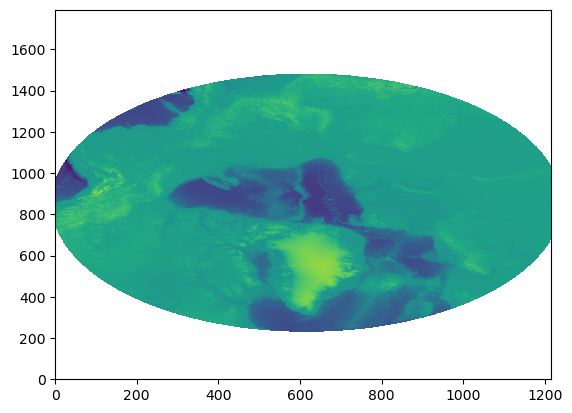

In [5]:
plt.pcolormesh(master['avg'])

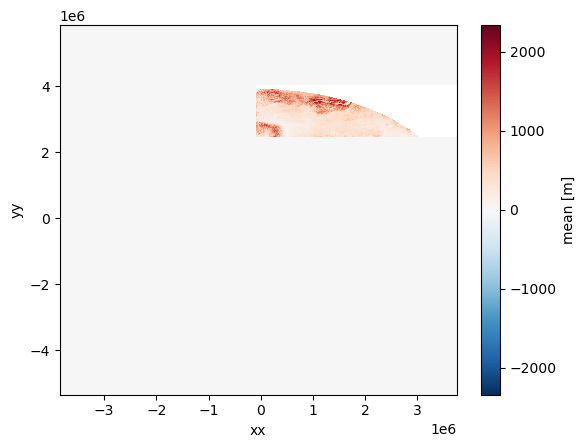

In [15]:
ds.avg.plot()

In [6]:

# # construct ds

# # variables
# data_vars = {}

# data_vars['avg']= (('yy', 'xx'), master['avg'], {'long_name':'mean', 'units':'m'})
# data_vars['5th']= (('yy', 'xx'), master['5th'], {'long_name':'mean', 'units':'m'})
# data_vars['25th']= (('yy', 'xx'), master['25th'], {'long_name':'mean', 'units':'m'})
# data_vars['50th']= (('yy', 'xx'), master['50th'], {'long_name':'mean', 'units':'m'})
# data_vars['75th']= (('yy', 'xx'), master['75th'], {'long_name':'mean', 'units':'m'})
# data_vars['95th']= (('yy', 'xx'), master['95th'], {'long_name':'mean', 'units':'m'})
# data_vars['N_abv_slvl']= (('yy', 'xx'), master['N_abv_slvl'], {'long_name':'# above sea level', 'units':'#'})

# # coordinates
# coords = {'yy': data['6250']['yy'][:,0], 'xx': data['6250']['xx'][0,:]}

# # attributes
# attrs = {}
# attrs['descript'] = 'UniBremen 6.25 km data, with estimated bathymetry from GEBCO'
# attrs['from'] = 'versions 1 -4'

# # Create the dataset
# ds = xr.Dataset(
#     data_vars = data_vars,
#     coords = coords,
#     attrs = attrs,    
# )

# ds.to_netcdf(path=f"/Users/mackenziejewell/Desktop/elevation_files/master_V1_from111.nc")



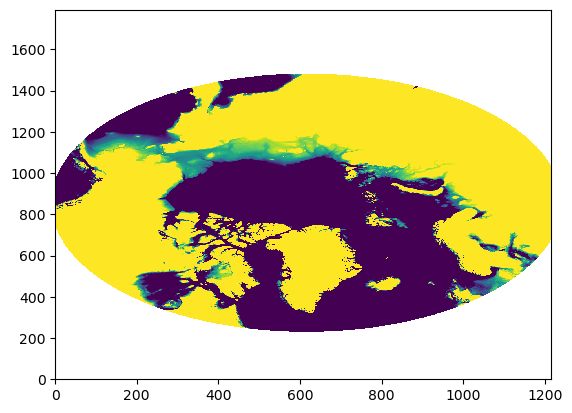

In [7]:
plt.pcolormesh(master['50th'], vmin=-100, vmax=0)

## Open reference GEBCO dataset

In [7]:
# path to GEBCO file
file = '/Volumes/Seagate_Jewell/KenzieStuff/GEBCO/GEBCO_2024/gebco_2024_n90.0_s55.0_w-180.0_e180.0.nc'

# open elevation data
ds_elv = xr.open_dataset(file)
ds_elv.close()
ds_lon, ds_lat = np.meshgrid(ds_elv.lon.values, ds_elv.lat.values)
elevat = ds_elv.elevation.values

print(elevat.shape)

(8400, 86400)


## Choose tagret grid to convert data

In [2]:
# ASI SIC 6.25 km grid
#---------------------
# SIC
data = {}
data['6250'] = UNISIC.open_remote_file(datetime(2021, 3, 24, 0, 0), 
                                      res = '6250', hem = 'n', method = 'urllib',
                                      area = True, include_units=False)

print(data['6250'].keys())

dict_keys(['proj', 'ds', 'x', 'y', 'xx', 'yy', 'sic', 'area'])


## Transform GEBCO points to ASI grid

In [8]:
trans_coords = data['6250']['proj'].transform_points(ccrs.PlateCarree(), ds_lon, ds_lat)

trans_x = trans_coords[:,:,0]
trans_y = trans_coords[:,:,1]

# CROPPING, DOWNSAMPLING TRANSFORMED GEBCO POINTS
#------------------------------------------------
# # sample every 3rd lon since lons take up 3rd distance of lats at 70 N
# d_lon = np.cos(70*np.pi/180)
# d_lon

# # lats along axis 0
# # lons along axis 1
# ref_x = trans_x[::2,::6]
# ref_y = trans_y[::2,::6]
# ref_z = elevat[::2, ::6]

# # down-sample further to 1 km spacing to save time
# # lon spacing in kilometers
# print(f'lon spacing: {np.diff(ds_lon[::2,::6], axis=1)[0][0] * 110 * d_lon :.2f} km')
# print(f'lat spacing: {np.diff(ds_lat[::2,::6], axis=0)[0][0] * 110 * 1 :.2f} km')


(168, 288)


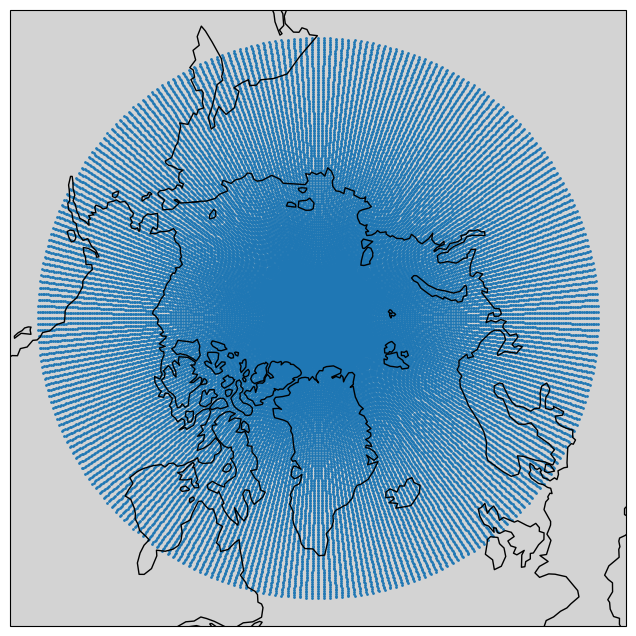

In [9]:
%matplotlib inline
# create figure
#--------------
fig, ax = plt.subplots(subplot_kw=dict(projection=data['6250']['proj']), figsize=(8,8))
ax.set_facecolor('lightgray')
ax.coastlines()

sp1 = 50
sp2 = 300
ax.scatter(trans_x[::sp1, ::sp2], trans_y[::sp1, ::sp2], s=1)

print(trans_x[::sp1, ::sp2].shape)


In [10]:
(3125*3125)/(750*750)

17.36111111111111

In [11]:
starttime = datetime.now()

# desired resolution
res = 750 #m

include = np.full(trans_x.shape, False)
exclude = np.full(trans_x.shape, False)
checked = np.full(trans_x.shape, False)

sp0, sp1 = 1, 1

all_sp0 = np.arange(sp0, np.shape(trans_x)[0]-1, sp0)
all_sp1 = np.arange(sp1, np.shape(trans_x)[1]-1, sp1)

for ii in all_sp0:
    for jj in all_sp1:

        if (ii % 5000 == 0)&(jj%10000==0):
            print(ii,jj)
        
        # if point has not already been checked, 
        # and has not already been specifically excluded, proceed to adding to list:
        if (checked[ii, jj] == False) & (exclude[ii, jj] == False):
            
            # distance to all adjacent cells
            dist = np.sqrt( (trans_x[ii-sp0:ii+sp0+1,jj-sp1:jj+sp1+1] - trans_x[ii,jj])**2 \
                   + (trans_y[ii-sp0:ii+sp0+1,jj-sp1:jj+sp1+1] - trans_y[ii,jj])**2)

            # exclude any cells that are within resolution of cell
            # and haven't already been included in other iterations
            exclude[ii-sp0:ii+sp0+1,jj-sp1:jj+sp1+1][(dist < res) & (include[ii-sp0:ii+sp0+1,jj-sp1:jj+sp1+1] == False)] = True
            checked[ii-sp0:ii+sp0+1,jj-sp1:jj+sp1+1][(dist < res)] = True

            include[ii, jj] = True
            exclude[ii, jj] = False
            checked[ii, jj] = True
        
        
print(f'runtime >>> {datetime.now() - starttime}')

5000 10000
5000 20000
5000 30000
5000 40000
5000 50000
5000 60000
5000 70000
5000 80000
runtime >>> 3:33:39.922237


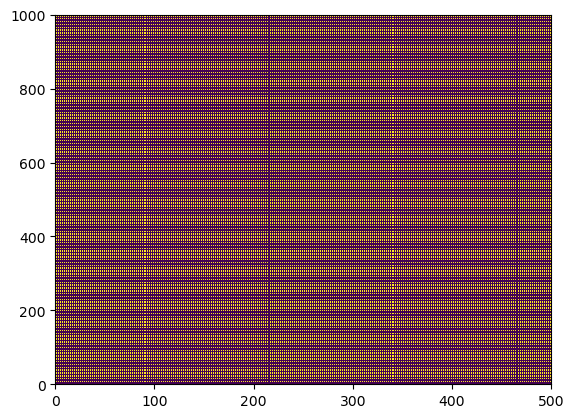

In [12]:
%matplotlib inline
# plt.pcolormesh(exclude[:500, :500])
plt.pcolormesh(include[:1000, :500])

In [22]:
trans_y.shape

(8400, 86400)

In [25]:


# variables = {'include' : (["lat", "lon"], include, {"description": "whether or not to include in calcs","units": "NA"}),
#              'yy' : (["lat", "lon"], trans_y, {"description": "y in UniB prjection","units": "m"}),
#              'xx' : (["lat", "lon"], trans_x, {"description": "y in UniB prjection","units": "m"}),
#             }

# # coordinates
# coordinates = {'lat':(["lat"], ds_elv.lat.values, {"units": "deg"}),
#                'lon':(["lon"], ds_elv.lon.values, {"units": "deg"})}

# # attributes
# # crop_range = f"d1 = {d1_i}:{d1_f}, d2 = {d2_i}:{d2_f}"
# descript = f"GEBCO bathymetry, transformed to coordinate system of UniB 6.25 km ASI SIC grid"
# attributes = {'description' : descript}

# ds = xr.Dataset(data_vars = variables, 
#                 coords = coordinates, 
#                 attrs = attributes)


# ds.to_netcdf(path='/Users/mackenziejewell/Desktop/GEBCO_on625kmASIgrid_latlon_downsampled.nc', mode='w')



# convert ASI points to lat,lon so as not to run calcs below 55 degrees

In [4]:
TRANS_coords = ccrs.PlateCarree().transform_points(data['6250']['proj'], data['6250']['xx'], data['6250']['yy'])
trans_lon = TRANS_coords[:,:,0]
trans_lat = TRANS_coords[:,:,1]

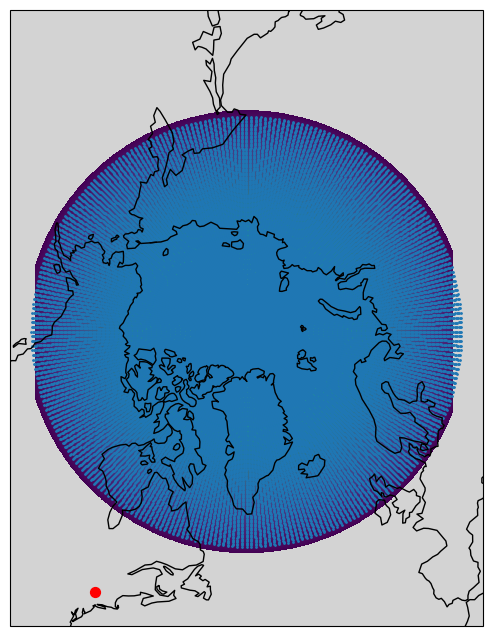

In [139]:
%matplotlib inline
# create figure
#--------------
fig, ax = plt.subplots(subplot_kw=dict(projection=data['6250']['proj']), figsize=(8,8))
ax.set_facecolor('lightgray')
ax.coastlines()

sp1 = 50
sp2 = 300
ax.scatter(trans_x[::sp1, ::sp2], trans_y[::sp1, ::sp2], s=1)

ax.scatter(xc, yc, s=50, c='r')


import numpy.ma as ma

ax.pcolormesh(data['6250']['xx'], data['6250']['yy'], 
              ma.masked_where(trans_lat < 54, trans_lat), zorder=-1)


## Open downsampled GEBCO lat/lon data

In [3]:
ds = xr.open_dataset('/Users/mackenziejewell/Desktop/GEBCO_on625kmASIgrid_latlon_downsampled.nc')
ds.close()
ds

<xarray.Dataset>
Dimensions:  (lat: 8400, lon: 86400)
Coordinates:
  * lat      (lat) float64 55.0 55.01 55.01 55.01 ... 89.99 89.99 89.99 90.0
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    include  (lat, lon) bool ...
    yy       (lat, lon) float64 ...
    xx       (lat, lon) float64 ...
Attributes:
    description:  GEBCO bathymetry, transformed to coordinate system of UniB ...

In [9]:
test_x = trans_x[ds.include]
test_y = trans_y[ds.include]
test_elev = elevat[ds.include]


In [142]:
len(test_x)

181392601

In [143]:
181392601/(86400*8400)

0.24993469053130513

In [14]:
dx = np.diff(data['6250']['xx'], axis=1)[0][0]
dy = np.diff(data['6250']['yy'], axis=0)[0][0]

mean_elev = np.zeros(data['6250']['xx'].shape)
elev_5th = np.zeros(data['6250']['xx'].shape)
elev_25th = np.zeros(data['6250']['xx'].shape)
elev_50th = np.zeros(data['6250']['xx'].shape)
elev_75th = np.zeros(data['6250']['xx'].shape)
elev_95th = np.zeros(data['6250']['xx'].shape)
above_sealvl = np.zeros(data['6250']['xx'].shape)

In [15]:
starttime = datetime.now()

for ii in range(690, 800):
# for ii in range(690, np.shape(mean_elev)[0]):
    for jj in range(np.shape(mean_elev)[1]):
        
        if ii % 30 == 0:
            if jj % 500 == 0:
                print(ii, jj)
                
        if trans_lat[ii,jj] < 54:
            
            mean_elev[ii, jj] = np.nan
            elev_5th[ii, jj] = np.nan
            elev_25th[ii, jj] = np.nan
            elev_50th[ii, jj] = np.nan
            elev_75th[ii, jj] = np.nan
            elev_95th[ii, jj] = np.nan
            above_sealvl[ii, jj] = np.nan
        
        
        else:
            
            # current coordinates
            xc = data['6250']['xx'][ii,jj]
            yc = data['6250']['yy'][ii,jj]

            # ranges within each box
            xcond = (test_x >= xc - dx/2) & (test_x < xc + dx/2)
            ycond = (test_y >= yc - dy/2) & (test_y < yc + dy/2)

            if len(test_elev[(xcond) & (ycond)]) != 0:

                # calc values
                mean_elev[ii, jj] = np.nanmean(test_elev[(xcond) & (ycond)])
                elev_5th[ii, jj] = np.nanpercentile(test_elev[(xcond) & (ycond)], 5)
                elev_25th[ii, jj] = np.nanpercentile(test_elev[(xcond) & (ycond)], 25)
                elev_50th[ii, jj] = np.nanpercentile(test_elev[(xcond) & (ycond)], 50)
                elev_75th[ii, jj] = np.nanpercentile(test_elev[(xcond) & (ycond)], 75)
                elev_95th[ii, jj] = np.nanpercentile(test_elev[(xcond) & (ycond)], 95)
                above_sealvl[ii, jj] = np.sum(test_elev[(xcond) & (ycond)]>0) / len(test_elev[(xcond) & (ycond)])


            else:

                mean_elev[ii, jj] = np.nan
                elev_5th[ii, jj] = np.nan
                elev_25th[ii, jj] = np.nan
                elev_50th[ii, jj] = np.nan
                elev_75th[ii, jj] = np.nan
                elev_95th[ii, jj] = np.nan
                above_sealvl[ii, jj] = np.nan

            
print(f'runtime >>> {datetime.now() - starttime}')
            

690 0
690 500
690 1000
720 0
720 500
720 1000
750 0
750 500
750 1000
780 0
780 500
780 1000
runtime >>> 2 days, 11:40:28.138069


In [150]:
mean_elev.shape

(1792, 1216)

In [151]:
(ii*jj)/(1792*1216)

0.1812744140625

In [160]:
print(ii, jj)

693 570


In [16]:

# # construct ds

# # variables
# data_vars = {}

# data_vars['avg']= (('yy', 'xx'), mean_elev, {'long_name':'mean', 'units':'m'})
# data_vars['5th']= (('yy', 'xx'), elev_5th, {'long_name':'mean', 'units':'m'})
# data_vars['25th']= (('yy', 'xx'), elev_25th, {'long_name':'mean', 'units':'m'})
# data_vars['50th']= (('yy', 'xx'), elev_50th, {'long_name':'mean', 'units':'m'})
# data_vars['75th']= (('yy', 'xx'), elev_75th, {'long_name':'mean', 'units':'m'})
# data_vars['95th']= (('yy', 'xx'), elev_95th, {'long_name':'mean', 'units':'m'})
# data_vars['N_abv_slvl']= (('yy', 'xx'), above_sealvl, {'long_name':'# above sea level', 'units':'#'})

# # coordinates
# coords = {'yy': data['6250']['yy'][:,0], 'xx': data['6250']['xx'][0,:]}

# # attributes
# attrs = {}
# attrs['descript'] = 'UniBremen 6.25 km data, with estimated bathymetry from GEBCO'
# attrs['ii'] = '690:800'
# attrs['jj'] = ':'

# # Create the dataset
# ds = xr.Dataset(
#     data_vars = data_vars,
#     coords = coords,
#     attrs = attrs,    
# )

# ds.to_netcdf(path=f"/Users/mackenziejewell/Desktop/Elevation_V2.nc")



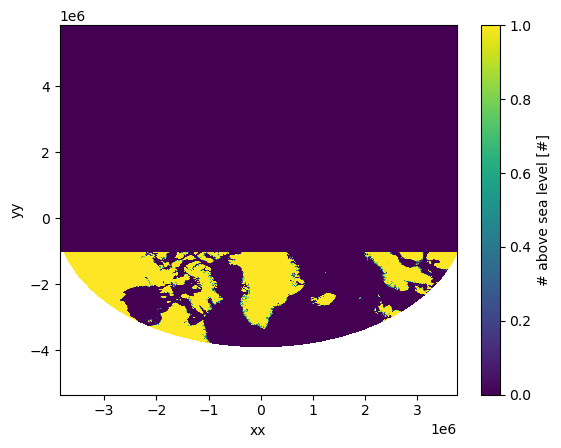

In [164]:
(ds['N_abv_slvl']).plot()